Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perim

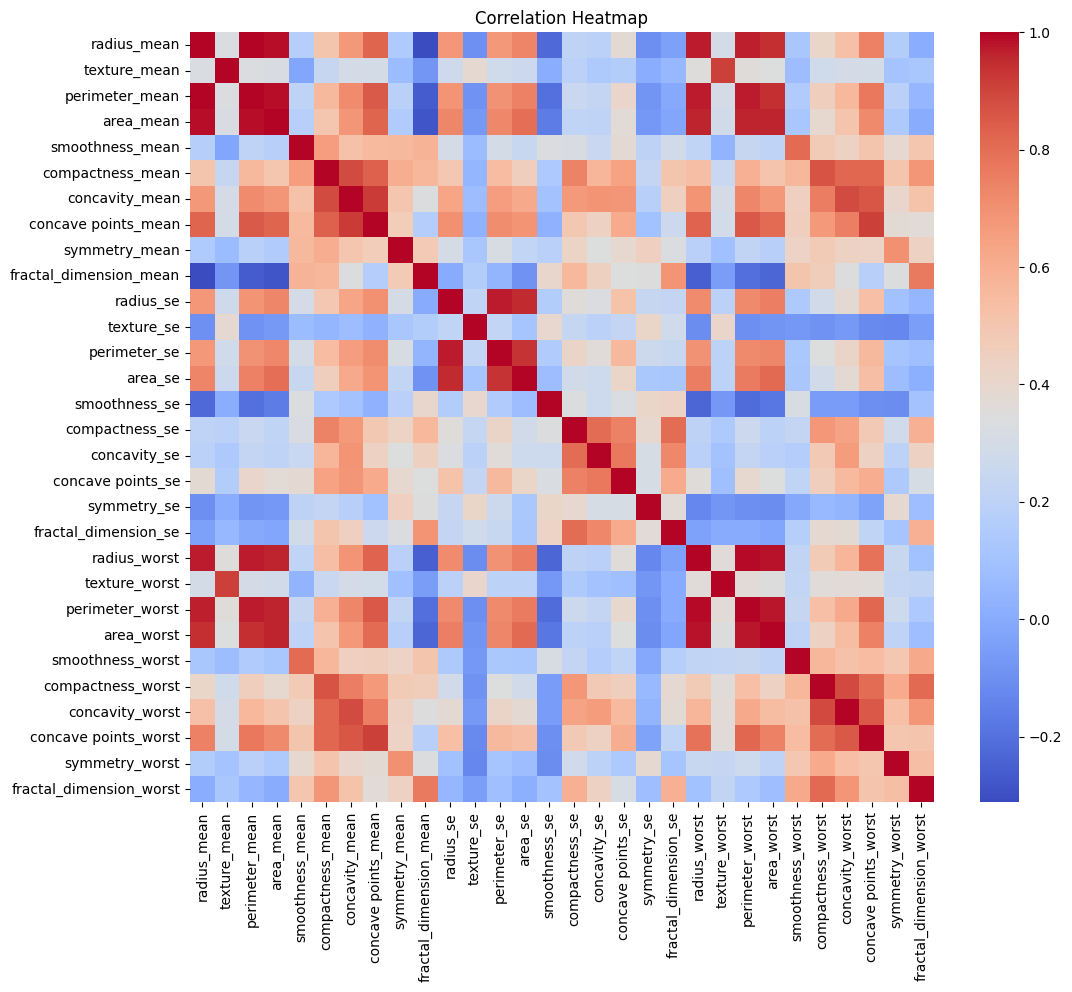

Model saved as breast_cancer_model.pkl
Model loaded successfully!

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[72  0]
 [ 3 39]]


<ipython-input-1-bc6c7e86946e>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")


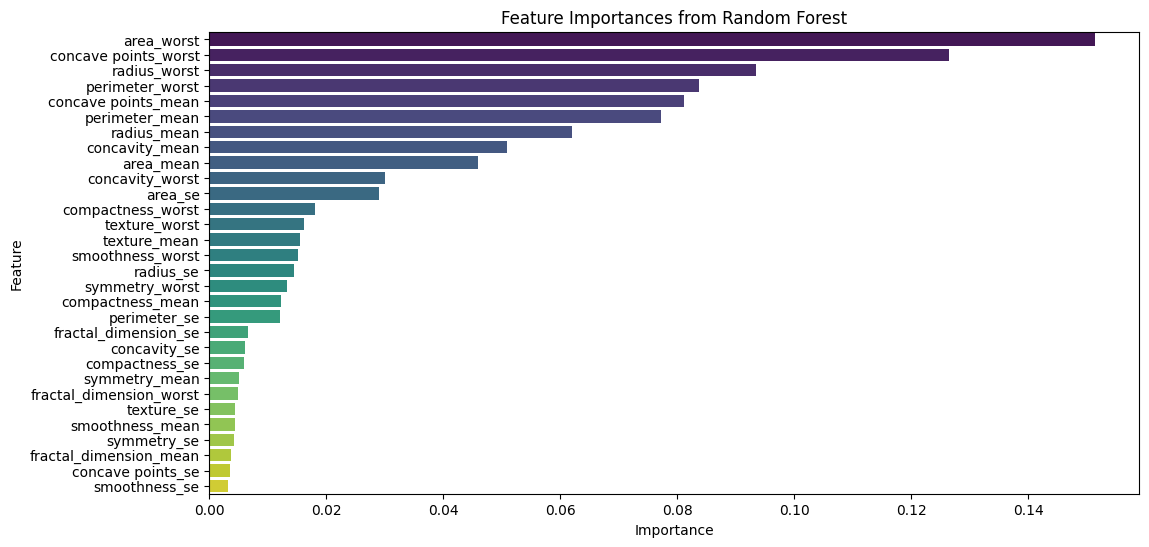

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle  # Import pickle for saving/loading the model

# Load the dataset
data = pd.read_csv("BreastCancer.csv")

# Display dataset information
print("Dataset Information:")
print(data.info())

print("\nFirst few rows of the dataset:")
print(data.head())

print("\nMissing Values:")
print(data.isnull().sum())

# Drop the unnecessary column
if 'Unnamed: 32' in data.columns:
    data = data.drop(columns=['Unnamed: 32'])

# Separate features and target
X = data.drop(columns=['id', 'diagnosis'])  # Features
y = data['diagnosis']  # Target variable

# Impute only numeric columns
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy="mean")

# Impute missing values for numeric features
X_imputed = pd.DataFrame(imputer.fit_transform(X[numeric_columns]), columns=numeric_columns)

# Map target variable to binary values
y = y.map({'B': 0, 'M': 1})  # Benign = 0, Malignant = 1

# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = X_imputed.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the trained model using pickle
model_filename = "breast_cancer_model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(model, file)
print(f"Model saved as {model_filename}")

# Load the model for prediction (optional: for demonstration)
with open(model_filename, "rb") as file:
    loaded_model = pickle.load(file)
print("Model loaded successfully!")

# Predictions and Evaluation
y_pred = loaded_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance visualization
feature_importances = pd.Series(model.feature_importances_, index=X_imputed.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
